In [ ]:
import gymnasium as gym

env = gym.make('FetchReach-v2')
print(env.reset())
achieved_g,desired_g,state,state_prime = unpackObs(env.reset())
# achieved_g = normalize_to_minus_one_one(achieved_g)
# desired_g = normalize_to_minus_one_one(desired_g)
# state = normalize_to_minus_one_one(state)
# state_prime = normalize_to_minus_one_one(state_prime)
print(achieved_g,desired_g,state,state_prime)
action = agent.select_action(state[:10])
print(action)
print(env.step(action))
observation, reward, done,x ,info = env.step(action)
print(reward)

In [ ]:
env.action_space.high[0]

In [ ]:
actor = ActorNet(state_size, action_size, hidden_size, max_action).to(device)
with torch.no_grad():
            input_state = torch.FloatTensor(state[:10]).to(device)
            action = actor(input_state)
            #detach and turn to numpy to use with np.random.choice()
            action = action.detach().cpu().numpy()
            #in DDPG add noise for exploration
            action = (action + np.random.normal(0.,[0.10463545140160027, 0.009425990872921002, 0.21728112610138017, 0.20284884391940886], 
                       size=env.action_space.shape[0])).clip(env.action_space.low[0], env.action_space.high[0])
            print(action)

In [ ]:
def normalize_to_minus_one_one(lst):
    min_val = min(lst)
    max_val = max(lst)
    range_val = max_val - min_val
    normalized = [((x - min_val) / range_val) * 2 - 1 for x in lst]
    return normalized

In [ ]:
# show a few frames of CartPole
for i in range(100):
    # do not use env.render() with jupyter notebook
    # env.render() 
    action = env.action_space.sample()
    print(env.step(action))
    obs, reward, done, x,info = env.step(action)
    if done:
        env.reset()
        
# env.close()

In [ ]:
env.reset()[0]['achieved_goal']

In [ ]:
action = env.action_space.sample()
print(env.step(action))
obs, reward, done, x,info = env.step(action)

In [ ]:
import numpy as np
def unpackObs(obs):
    return  obs[0]['achieved_goal'], obs[0]['desired_goal'], np.concatenate((obs[0]['observation'], obs[0]['desired_goal'])),np.concatenate((obs[0]['observation'], obs[0]['achieved_goal']))

In [ ]:
unpackObs(env.reset())
assert(len(unpackObs(env.reset())) == 4)

In [ ]:
unpackObs(env.reset())

In [ ]:
pairs = [(5, "apple"), (2, "banana"), (9, "cherry")]
x = []
for i in range(1,len(pairs)):
    x.append(pairs[i-1])
    # x.append(pairs[i])

In [ ]:
x

In [ ]:
import os
print(os.environ['CONDA_PREFIX'])

## SB3 Implmentation

In [2]:
import gymnasium as gym 
from stable_baselines3 import PPO, DDPG, HerReplayBuffer, TD3, A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.callbacks import CheckpointCallback
import numpy as np
import torch
import torch.nn as nn
import os
from stable_baselines3.common.env_util import make_vec_env


In [2]:
environment_name = "FetchReach-v2"
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
goal_selection_strategy = "future"
# model = DDPG('MultiInputPolicy', 
#             env, 
#             action_noise=action_noise,
#             replay_buffer_class = HerReplayBuffer, 
#             replay_buffer_kwargs=dict(
#                 n_sampled_goal=4,
#                 goal_selection_strategy=goal_selection_strategy,
#             ), 
#             verbose=1)
model = DDPG(
        "MultiInputPolicy",
        env,
        action_noise= action_noise,
        verbose=0,
        gamma= 0.9741273742139606,
        tau=0.022108947086237923,
        batch_size=166,
        buffer_size=85344,
        learning_rate= 0.0009678496054008291,
        policy_kwargs= dict(
            activation_fn = nn.ReLU,
        ),
        learning_starts=100,
        replay_buffer_class=HerReplayBuffer,
        replay_buffer_kwargs=dict(
        n_sampled_goal=4,
        goal_selection_strategy="future",
        ),
    )

# {'gamma': 0.9741273742139606, 'tau': 0.022108947086237923, 'batch_size': 166, 'buffer_size': 85344, 'learning_rate': 0.0009678496054008291, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


In [3]:
env_id = "FetchReach-v2"
# Env used only for evaluation
eval_envs = make_vec_env(env_id, n_envs=10)
# 4000 training timesteps
budget_pendulum = 4000

In [11]:
mean_reward, std_reward = evaluate_policy(model, eval_envs, n_eval_episodes=1000, deterministic=True)

print(f"PPO Mean episode reward: {mean_reward:.2f} +/- {std_reward:.2f}")

PPO Mean episode reward: -49.18 +/- 3.45


In [3]:
environment_name = "FetchReach-v2"
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
goal_selection_strategy = "future"
model = DDPG('MultiInputPolicy', 
            env, 
            action_noise=action_noise,
            replay_buffer_class = HerReplayBuffer, 
            replay_buffer_kwargs=dict(
                n_sampled_goal=4,
                goal_selection_strategy=goal_selection_strategy,
            ), 
            verbose=1)

Using cpu device


In [5]:
checkpoint_callback = CheckpointCallback(save_freq=20, save_path='/teamspace/studios/this_studio/optimized_logs/', name_prefix='ddpg_model')
model.learn(total_timesteps=1000, callback=checkpoint_callback) #learn 
ddpg_path = '/teamspace/studios/this_studio/FetchReach_model_ddpg_optimized'
model.save(ddpg_path)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.compute_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.compute_reward` for environment variables or `env.get_wrapper_attr('compute_reward')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 80       |
|    time_elapsed    | 2        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | 0.727    |
|    critic_loss     | 0.192    |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------
---------------------------------
| rollout/           |          |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 61       |
|    time_elapsed    | 6        |
|    total_timesteps | 400      |
| train/             |          |
|    actor_loss      | 1.12     |
|    critic_loss     | 0.157    |
|    learning_rate   | 0.001    |
|    n_updates       | 299      |
---------------------------------
---------------------------------
| rollout/    

# Hyperparameter Optimzation uisng SB3 on TD3 with HER

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 13.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [17]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_param_importances

In [18]:
N_TRIALS = 1000  # Maximum number of trials
N_JOBS = 1 # Number of jobs to run in parallel
N_STARTUP_TRIALS = 5  # Stop random sampling after N_STARTUP_TRIALS
N_EVALUATIONS = 2  # Number of evaluations during the training
N_TIMESTEPS = int(2e4)  # Training budget
EVAL_FREQ = int(N_TIMESTEPS / N_EVALUATIONS)
N_EVAL_ENVS = 5
N_EVAL_EPISODES = 10
TIMEOUT = int(60 * 15)  # 15 minutes
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
ENV_ID = "FetchReach-v2"

DEFAULT_HYPERPARAMS = {
    "policy": "MultiInputPolicy",
    "env": ENV_ID,
    # "buffer_size":1000000,
    # # "action_noise":action_noise,
    # "replay_buffer_class" : HerReplayBuffer,
    # "replay_buffer_kwargs":{
    #     "n_sampled_goal":4,
    #     "goal_selection_strategy":"future",
    # }
    
}

In [19]:
from typing import Any, Dict
import torch
import torch.nn as nn

def sample_a2c_params(trial: optuna.Trial) -> Dict[str, Any]:
    """
    Sampler for A2C hyperparameters.

    :param trial: Optuna trial object
    :return: The sampled hyperparameters for the given trial.
    """
    # Discount factor between 0.9 and 0.9999
    gamma = 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True)
    max_grad_norm = trial.suggest_float("max_grad_norm", 0.3, 5.0, log=True)
    # 8, 16, 32, ... 1024
    n_steps = 2 ** trial.suggest_int("exponent_n_steps", 3, 10)

    ### YOUR CODE HERE
    # TODO:
    # - define the learning rate search space [1e-5, 1] (log) -> `suggest_float`
    # - define the network architecture search space ["tiny", "small"] -> `suggest_categorical`
    # - define the activation function search space ["tanh", "relu"]
    learning_rate = trial.suggest_float("lr", 1e-5, 1, log=True)
    net_arch = trial.suggest_categorical("net_arch", ["tiny","small"])
    activation_fn = trial.suggest_categorical("activation_fn", ["tanh", "relu"])

    ### END OF YOUR CODE

    # Display true values
    trial.set_user_attr("gamma_", gamma)
    trial.set_user_attr("n_steps", n_steps)

    net_arch = [
        {"pi": [64], "vf": [64]}
        if net_arch == "tiny"
        else {"pi": [64, 64], "vf": [64, 64]}
    ]

    activation_fn = {"tanh": nn.Tanh, "relu": nn.ReLU}[activation_fn]

    return {
        "n_steps": n_steps,
        "gamma": gamma,
        "learning_rate": learning_rate,
        "max_grad_norm": max_grad_norm,
        "policy_kwargs": {
            "net_arch": net_arch,
            "activation_fn": activation_fn,
        },
    }

In [42]:
from typing import Any, Dict
import torch
import torch.nn as nn

def sample_ddpg_params(trial: optuna.Trial) -> Dict[str, Any]:
    """
    Sampler for DDPG hyperparameters.

    :param trial: Optuna trial object
    :return: The sampled hyperparameters for the given trial.
    """
    # Discount factor between 0.9 and 0.9999
    gamma = 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True)
    tau = trial.suggest_float("tau", 0, 1, log=False)
    batch_size = trial.suggest_int("batch_size", 64,256,log=False )
    buffer_size = trial.suggest_int("buffer_size", 10000, 1000000, log=True)
    # max_grad_norm = trial.suggest_float("max_grad_norm", 0.3, 5.0, log=True)
    # 8, 16, 32, ... 1024
    # n_steps = 2 ** trial.suggest_int("exponent_n_steps", 3, 10)

    ### YOUR CODE HERE
    # TODO:
    # - define the learning rate search space [1e-5, 1] (log) -> `suggest_float`
    # - define the network architecture search space ["tiny", "small"] -> `suggest_categorical`
    # - define the activation function search space ["tanh", "relu"]
    learning_rate = trial.suggest_float("lr", 1e-5, 1, log=True)
    net_arch = trial.suggest_categorical("net_arch", ["tiny","small"])
    activation_fn = trial.suggest_categorical("activation_fn", ["tanh", "relu"])
    # n_sampled_goal = trial.suggest_int("n_sampled_goal", 1, 10, log=False)
    # goal_selection_strategy = trial.suggest_categorical("goal_selection_strategy", ["future","final","episode"])

    ### END OF YOUR CODE

    # Display true values
    trial.set_user_attr("gamma_", gamma)
    # trial.set_user_attr("n_steps", n_steps)

    net_arch = [
        {"pi": [64,64], "vf": [64,64]}
        if net_arch == "tiny"
        else {"pi": [400, 300], "vf": [400, 300]}
    ]

    activation_fn = {"tanh": nn.Tanh, "relu": nn.ReLU}[activation_fn]

    # goal_selection_strategy = {"future": "future", "final": "final", "episode": "episode"}[goal_selection_strategy]



    return {
        # "n_steps": n_steps,
        "gamma": gamma,
        "tau":tau,
        "batch_size":batch_size,
        "buffer_size":buffer_size,
        "learning_rate": learning_rate,
        # "max_grad_norm": max_grad_norm,
        "policy_kwargs": {
            # "net_arch": net_arch,
            "activation_fn": activation_fn,
        }
    }

In [43]:
from stable_baselines3.common.callbacks import EvalCallback

class TrialEvalCallback(EvalCallback):
    """
    Callback used for evaluating and reporting a trial.
    
    :param eval_env: Evaluation environement
    :param trial: Optuna trial object
    :param n_eval_episodes: Number of evaluation episodes
    :param eval_freq:   Evaluate the agent every ``eval_freq`` call of the callback.
    :param deterministic: Whether the evaluation should
        use a stochastic or deterministic policy.
    :param verbose:
    """

    def __init__(
        self,
        eval_env: gym.Env,
        trial: optuna.Trial,
        n_eval_episodes: int = 5,
        eval_freq: int = 10000,
        deterministic: bool = False,
        verbose: int = 0,
        best_model_save_path: str = "/teamspace/studios/this_studio/A2C_Mode",

    ):

        super().__init__(
            eval_env=eval_env,
            n_eval_episodes=n_eval_episodes,
            eval_freq=eval_freq,
            deterministic=deterministic,
            verbose=verbose,
            best_model_save_path = best_model_save_path,
        )
        self.trial = trial
        self.eval_idx = 0
        self.is_pruned = False

    def _on_step(self) -> bool:
        if self.eval_freq > 0 and self.n_calls % self.eval_freq == 0:
            # Evaluate policy (done in the parent class)
            super()._on_step()
            self.eval_idx += 1
            # Send report to Optuna
            self.trial.report(self.last_mean_reward, self.eval_idx)
            # Prune trial if need
            if self.trial.should_prune():
                self.is_pruned = True
                return False
        return True

In [44]:
from stable_baselines3.common.env_util import make_vec_env
def objective(trial: optuna.Trial) -> float:
    """
    Objective function using by Optuna to evaluate
    one configuration (i.e., one set of hyperparameters).

    Given a trial object, it will sample hyperparameters,
    evaluate it and report the result (mean episodic reward after training)

    :param trial: Optuna trial object
    :return: Mean episodic reward after training
    """
    params = sample_ddpg_params(trial)
    
    env = gym.make(environment_name)
    env = DummyVecEnv([lambda: env])

    eval_envs = make_vec_env(ENV_ID, n_envs=N_EVAL_ENVS)

    # kwargs = DEFAULT_HYPERPARAMS.copy()
    ### YOUR CODE HERE
    #: 
    # 1. Sample hyperparameters and update the default keyword arguments: `kwargs.update(other_params)`
    # 2. Create the evaluation envs
    # 3. Create the `TrialEvalCallback`

    # 1. Sample hyperparameters and update the keyword arguments
    print(sample_ddpg_params(trial))
    #kwargs.update(sample_a2c_params(trial))
    # kwargs.update(sample_ddpg_params(trial))

    n_actions = env.action_space.shape[-1]
    action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
    
    # Create the RL model
    #model = A2C(**kwargs)
    model = DDPG(
        "MultiInputPolicy",
        env,
        action_noise=action_noise,
        verbose=0,
        **params,
        learning_starts=100,
        replay_buffer_class=HerReplayBuffer,
        replay_buffer_kwargs=dict(
        n_sampled_goal=4,
        goal_selection_strategy="future",
        ),
    )

    # 2. Create envs used for evaluation using `make_vec_env`, `ENV_ID` and `N_EVAL_ENVS`
    # eval_envs = make_vec_env(ENV_ID, n_envs=N_EVAL_ENVS)
    # eval_envs = HERGoalEnvWrapper(eval_envs)

    # 3. Create the `TrialEvalCallback` callback defined above that will periodically evaluate
    # and report the performance using `N_EVAL_EPISODES` every `EVAL_FREQ`
    # TrialEvalCallback signature:
    # TrialEvalCallback(eval_env, trial, n_eval_episodes, eval_freq, deterministic, verbose)
    eval_callback = TrialEvalCallback(eval_envs, trial, n_eval_episodes=N_EVAL_EPISODES, eval_freq=EVAL_FREQ)

    ### END OF YOUR CODE

    nan_encountered = False
    try:
        # Train the model
        model.learn(N_TIMESTEPS, callback=eval_callback)
    except AssertionError as e:
        # Sometimes, random hyperparams can generate NaN
        print(e)
        nan_encountered = True
    finally:
        # Free memory
        model.env.close()
        eval_envs.close()

    # Tell the optimizer that the trial failed
    if nan_encountered:
        return float(0) #replace with "nan" if error

    if eval_callback.is_pruned:
        raise optuna.exceptions.TrialPruned()

    return eval_callback.last_mean_reward

In [46]:
import torch as th

# Set pytorch num threads to 1 for faster training
th.set_num_threads(1)
# Select the sampler, can be random, TPESampler, CMAES, ...
sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
# Do not prune before 1/3 of the max budget is used
pruner = MedianPruner(
    n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=N_EVALUATIONS // 3
)
# Create the study and start the hyperparameter optimization
study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")
try:
    study.optimize(objective, n_trials=N_TRIALS, n_jobs=N_JOBS) # timeout=TIMEOUT)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print(f"    {key}: {value}")

# Write report
study.trials_dataframe().to_csv("study_results_ddpg_fetchreach.csv")

fig1 = plot_optimization_history(study)
fig2 = plot_param_importances(study)

fig1.show()
fig2.show()

[I 2024-06-20 07:50:58,837] A new study created in memory with name: no-name-a880c983-2a93-44ab-860e-9302f29d7ea9


{'gamma': 0.9993421790412854, 'tau': 0.9771043197676195, 'batch_size': 103, 'buffer_size': 170800, 'learning_rate': 2.7575589792046808e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.compute_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.compute_reward` for environment variables or `env.get_wrapper_attr('compute_reward')` that will search the reminding wrappers.
  logger.warn(
[I 2024-06-20 07:55:31,310] Trial 0 finished with value: -50.0 and parameters: {'gamma': 0.0006578209587146004, 'tau': 0.9771043197676195, 'batch_size': 103, 'buffer_size': 170800, 'lr': 2.7575589792046808e-05, 'net_arch': 'tiny', 'activation_fn': 'tanh'}. Best is trial 0 with value: -50.0.


{'gamma': 0.9981636207570014, 'tau': 0.8736350672786739, 'batch_size': 65, 'buffer_size': 159676, 'learning_rate': 0.0037163038232821874, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:01:10,605] Trial 1 finished with value: -49.9 and parameters: {'gamma': 0.0018363792429986101, 'tau': 0.8736350672786739, 'batch_size': 65, 'buffer_size': 159676, 'lr': 0.0037163038232821874, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 1 with value: -49.9.


{'gamma': 0.9889489387083114, 'tau': 0.5787070426665084, 'batch_size': 126, 'buffer_size': 890228, 'learning_rate': 0.001299077057406192, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 08:06:21,360] Trial 2 finished with value: -50.0 and parameters: {'gamma': 0.011051061291688674, 'tau': 0.5787070426665084, 'batch_size': 126, 'buffer_size': 890228, 'lr': 0.001299077057406192, 'net_arch': 'small', 'activation_fn': 'tanh'}. Best is trial 1 with value: -49.9.


{'gamma': 0.9969901634402519, 'tau': 0.4723175464598196, 'batch_size': 167, 'buffer_size': 623006, 'learning_rate': 0.00023576016907114202, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 08:11:49,861] Trial 3 finished with value: -49.8 and parameters: {'gamma': 0.00300983655974806, 'tau': 0.4723175464598196, 'batch_size': 167, 'buffer_size': 623006, 'lr': 0.00023576016907114202, 'net_arch': 'small', 'activation_fn': 'tanh'}. Best is trial 3 with value: -49.8.


{'gamma': 0.9997854971316794, 'tau': 0.582408269207137, 'batch_size': 165, 'buffer_size': 59439, 'learning_rate': 0.0016022597348332671, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:18:19,884] Trial 4 finished with value: -49.7 and parameters: {'gamma': 0.0002145028683206174, 'tau': 0.582408269207137, 'batch_size': 165, 'buffer_size': 59439, 'lr': 0.0016022597348332671, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 4 with value: -49.7.


{'gamma': 0.9998667448390275, 'tau': 0.03988280159549007, 'batch_size': 248, 'buffer_size': 13898, 'learning_rate': 0.9082486246118957, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:26:09,714] Trial 5 finished with value: -49.9 and parameters: {'gamma': 0.00013325516097256092, 'tau': 0.03988280159549007, 'batch_size': 248, 'buffer_size': 13898, 'lr': 0.9082486246118957, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 4 with value: -49.7.


{'gamma': 0.9554270917671509, 'tau': 0.4470088843189317, 'batch_size': 192, 'buffer_size': 21921, 'learning_rate': 0.05931252691751859, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:29:23,897] Trial 6 pruned. 


{'gamma': 0.9998580512692412, 'tau': 0.18265605524053963, 'batch_size': 217, 'buffer_size': 45430, 'learning_rate': 0.0193551203736735, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:32:52,627] Trial 7 pruned. 


{'gamma': 0.9994867711908918, 'tau': 0.7184766298996259, 'batch_size': 146, 'buffer_size': 65314, 'learning_rate': 1.5101865299199116e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:35:35,008] Trial 8 pruned. 


{'gamma': 0.9893752247828784, 'tau': 0.2907422751171632, 'batch_size': 185, 'buffer_size': 252556, 'learning_rate': 0.0002724579501831605, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:42:08,088] Trial 9 finished with value: -47.5 and parameters: {'gamma': 0.010624775217121617, 'tau': 0.2907422751171632, 'batch_size': 185, 'buffer_size': 252556, 'lr': 0.0002724579501831605, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 9 with value: -47.5.


{'gamma': 0.9170265387184782, 'tau': 0.2956966805061621, 'batch_size': 253, 'buffer_size': 383959, 'learning_rate': 0.00016161950011335497, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 08:45:20,870] Trial 10 pruned. 


{'gamma': 0.9868794811173481, 'tau': 0.29341088085012457, 'batch_size': 186, 'buffer_size': 234449, 'learning_rate': 0.0006312381463305594, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:48:36,800] Trial 11 pruned. 


{'gamma': 0.9877646246358817, 'tau': 0.670309870955291, 'batch_size': 210, 'buffer_size': 77994, 'learning_rate': 0.006399828578318492, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:55:40,872] Trial 12 finished with value: -49.9 and parameters: {'gamma': 0.01223537536411835, 'tau': 0.670309870955291, 'batch_size': 210, 'buffer_size': 77994, 'lr': 0.006399828578318492, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 9 with value: -47.5.


{'gamma': 0.9990944684881502, 'tau': 0.3491613774524635, 'batch_size': 150, 'buffer_size': 32384, 'learning_rate': 0.00010067429457294788, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 08:58:35,434] Trial 13 pruned. 


{'gamma': 0.9926782028606567, 'tau': 0.11434436335154974, 'batch_size': 118, 'buffer_size': 117062, 'learning_rate': 0.0008687854268982761, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:04:31,528] Trial 14 finished with value: -6.3 and parameters: {'gamma': 0.007321797139343367, 'tau': 0.11434436335154974, 'batch_size': 118, 'buffer_size': 117062, 'lr': 0.0008687854268982761, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 14 with value: -6.3.


{'gamma': 0.9729841735896851, 'tau': 0.018939803474223638, 'batch_size': 106, 'buffer_size': 329977, 'learning_rate': 4.4988103303741616e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:09:45,899] Trial 15 finished with value: -49.4 and parameters: {'gamma': 0.027015826410314837, 'tau': 0.018939803474223638, 'batch_size': 106, 'buffer_size': 329977, 'lr': 4.4988103303741616e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 14 with value: -6.3.


{'gamma': 0.994162681548723, 'tau': 0.13783773958967338, 'batch_size': 66, 'buffer_size': 121834, 'learning_rate': 0.0006721712828767383, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:12:28,718] Trial 16 pruned. 


{'gamma': 0.9950724713552999, 'tau': 0.1778128550388754, 'batch_size': 124, 'buffer_size': 471217, 'learning_rate': 0.09050895784707208, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:15:30,773] Trial 17 pruned. 


{'gamma': 0.9713044031236061, 'tau': 0.363286658185408, 'batch_size': 92, 'buffer_size': 261995, 'learning_rate': 0.009631145165340266, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 09:17:55,567] Trial 18 pruned. 


{'gamma': 0.9984208783675806, 'tau': 0.1189573920401123, 'batch_size': 225, 'buffer_size': 106601, 'learning_rate': 0.0005184723309118714, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:24:56,962] Trial 19 finished with value: -50.0 and parameters: {'gamma': 0.0015791216324193974, 'tau': 0.1189573920401123, 'batch_size': 225, 'buffer_size': 106601, 'lr': 0.0005184723309118714, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 14 with value: -6.3.


{'gamma': 0.9939289799155016, 'tau': 0.24737205536138462, 'batch_size': 135, 'buffer_size': 197459, 'learning_rate': 9.72142967377655e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:30:45,610] Trial 20 finished with value: -49.8 and parameters: {'gamma': 0.006071020084498417, 'tau': 0.24737205536138462, 'batch_size': 135, 'buffer_size': 197459, 'lr': 9.72142967377655e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 14 with value: -6.3.


{'gamma': 0.9795417751356246, 'tau': 0.02224675072008557, 'batch_size': 102, 'buffer_size': 347882, 'learning_rate': 5.092629894170653e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:33:23,298] Trial 21 pruned. 


{'gamma': 0.9568820882148866, 'tau': 0.02059941354020507, 'batch_size': 83, 'buffer_size': 633890, 'learning_rate': 1.1155598720031893e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:38:24,739] Trial 22 finished with value: -49.5 and parameters: {'gamma': 0.043117911785113344, 'tau': 0.02059941354020507, 'batch_size': 83, 'buffer_size': 633890, 'lr': 1.1155598720031893e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 14 with value: -6.3.


{'gamma': 0.9086624838023981, 'tau': 0.10317294458722988, 'batch_size': 118, 'buffer_size': 281886, 'learning_rate': 0.00029407631293953474, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:44:09,982] Trial 23 finished with value: -1.8 and parameters: {'gamma': 0.09133751619760186, 'tau': 0.10317294458722988, 'batch_size': 118, 'buffer_size': 281886, 'lr': 0.00029407631293953474, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.9043338663277906, 'tau': 0.21450905272680937, 'batch_size': 183, 'buffer_size': 134162, 'learning_rate': 0.0003606548274232816, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:47:23,171] Trial 24 pruned. 


{'gamma': 0.9969265644411075, 'tau': 0.3584138828603502, 'batch_size': 119, 'buffer_size': 249597, 'learning_rate': 0.0021004846531533306, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:50:28,743] Trial 25 pruned. 


{'gamma': 0.9914799342876678, 'tau': 0.1189224117261572, 'batch_size': 145, 'buffer_size': 97812, 'learning_rate': 0.0010477688122085696, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:53:33,711] Trial 26 pruned. 


{'gamma': 0.9803153188745756, 'tau': 0.09858786351970528, 'batch_size': 168, 'buffer_size': 925776, 'learning_rate': 0.00018129738108600772, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 09:56:24,516] Trial 27 pruned. 


{'gamma': 0.9475324687633745, 'tau': 0.26253988662831107, 'batch_size': 197, 'buffer_size': 442506, 'learning_rate': 0.003954777869589844, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 09:59:58,316] Trial 28 pruned. 


{'gamma': 0.9986155760664499, 'tau': 0.3971894722920959, 'batch_size': 111, 'buffer_size': 181254, 'learning_rate': 3.559700509958445e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 10:02:16,211] Trial 29 pruned. 


{'gamma': 0.9954828913243906, 'tau': 0.21570997154726618, 'batch_size': 79, 'buffer_size': 153852, 'learning_rate': 9.494414821365702e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:07:18,441] Trial 30 finished with value: -50.0 and parameters: {'gamma': 0.004517108675609418, 'tau': 0.21570997154726618, 'batch_size': 79, 'buffer_size': 153852, 'lr': 9.494414821365702e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.9727331530365957, 'tau': 0.04421319058345419, 'batch_size': 98, 'buffer_size': 278935, 'learning_rate': 4.436153892998109e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:12:31,068] Trial 31 finished with value: -49.5 and parameters: {'gamma': 0.02726684696340431, 'tau': 0.04421319058345419, 'batch_size': 98, 'buffer_size': 278935, 'lr': 4.436153892998109e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.9817710777301679, 'tau': 0.9946096052047901, 'batch_size': 111, 'buffer_size': 348936, 'learning_rate': 2.46873554405666e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:17:54,353] Trial 32 finished with value: -49.8 and parameters: {'gamma': 0.018228922269832044, 'tau': 0.9946096052047901, 'batch_size': 111, 'buffer_size': 348936, 'lr': 2.46873554405666e-05, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.9913260721958915, 'tau': 0.0851842606515868, 'batch_size': 128, 'buffer_size': 567102, 'learning_rate': 0.0003246975517869488, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:20:52,523] Trial 33 pruned. 


{'gamma': 0.9373678844916954, 'tau': 0.006350720026833401, 'batch_size': 137, 'buffer_size': 187010, 'learning_rate': 9.106119421157285e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:23:36,319] Trial 34 pruned. 


{'gamma': 0.9681786711386203, 'tau': 0.8739669319616764, 'batch_size': 175, 'buffer_size': 307977, 'learning_rate': 0.0011940372760416492, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 10:26:20,246] Trial 35 pruned. 


{'gamma': 0.9976615441612903, 'tau': 0.1633129234186459, 'batch_size': 112, 'buffer_size': 82186, 'learning_rate': 0.00021709100395296224, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:29:04,938] Trial 36 pruned. 


{'gamma': 0.9821587616082714, 'tau': 0.07288971758997415, 'batch_size': 160, 'buffer_size': 620987, 'learning_rate': 0.003033735835978285, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:35:56,261] Trial 37 finished with value: -2.1 and parameters: {'gamma': 0.017841238391728593, 'tau': 0.07288971758997415, 'batch_size': 160, 'buffer_size': 620987, 'lr': 0.003033735835978285, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.99084527663191, 'tau': 0.5548731003620411, 'batch_size': 155, 'buffer_size': 619258, 'learning_rate': 0.0026575713360567385, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:39:19,154] Trial 38 pruned. 


{'gamma': 0.9858353467563102, 'tau': 0.07169222919895943, 'batch_size': 203, 'buffer_size': 731729, 'learning_rate': 0.02309595688119062, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 10:42:52,349] Trial 39 pruned. 


{'gamma': 0.9963255823902618, 'tau': 0.30609642647519786, 'batch_size': 233, 'buffer_size': 45908, 'learning_rate': 0.5672197041270528, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:46:44,388] Trial 40 pruned. 


{'gamma': 0.9632659135679091, 'tau': 0.08455719058667434, 'batch_size': 162, 'buffer_size': 471301, 'learning_rate': 0.0009076956656881169, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:53:21,235] Trial 41 finished with value: -2.0 and parameters: {'gamma': 0.036734086432090876, 'tau': 0.08455719058667434, 'batch_size': 162, 'buffer_size': 471301, 'lr': 0.0009076956656881169, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 23 with value: -1.8.


{'gamma': 0.9171504995346392, 'tau': 0.16834360944905058, 'batch_size': 165, 'buffer_size': 482032, 'learning_rate': 0.0009883701661572695, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 10:59:59,853] Trial 42 finished with value: -1.4 and parameters: {'gamma': 0.08284950046536081, 'tau': 0.16834360944905058, 'batch_size': 165, 'buffer_size': 482032, 'lr': 0.0009883701661572695, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9323686549961232, 'tau': 0.07054788300256916, 'batch_size': 162, 'buffer_size': 793231, 'learning_rate': 0.004134885350165996, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:03:31,263] Trial 43 pruned. 


{'gamma': 0.9625755435757257, 'tau': 0.19058418753405812, 'batch_size': 176, 'buffer_size': 489426, 'learning_rate': 0.0010199886568900357, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:10:20,931] Trial 44 finished with value: -7.5 and parameters: {'gamma': 0.0374244564242743, 'tau': 0.19058418753405812, 'batch_size': 176, 'buffer_size': 489426, 'lr': 0.0010199886568900357, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9106404175776678, 'tau': 0.1340060052712116, 'batch_size': 137, 'buffer_size': 444839, 'learning_rate': 0.008946380644719379, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:13:33,196] Trial 45 pruned. 


{'gamma': 0.9408283490939063, 'tau': 0.0661313982260346, 'batch_size': 155, 'buffer_size': 932958, 'learning_rate': 0.002184517224861537, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:16:57,670] Trial 46 pruned. 


{'gamma': 0.9631147163783274, 'tau': 0.24050299345014084, 'batch_size': 145, 'buffer_size': 725414, 'learning_rate': 0.0012560136119049439, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:20:14,340] Trial 47 pruned. 


{'gamma': 0.9257374377779553, 'tau': 0.1556603574929456, 'batch_size': 172, 'buffer_size': 14051, 'learning_rate': 0.0005150459476045427, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:26:29,164] Trial 48 finished with value: -49.8 and parameters: {'gamma': 0.0742625622220447, 'tau': 0.1556603574929456, 'batch_size': 172, 'buffer_size': 14051, 'lr': 0.0005150459476045427, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9526257569539471, 'tau': 0.44690645646371063, 'batch_size': 162, 'buffer_size': 542329, 'learning_rate': 0.019729898306758937, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:29:44,292] Trial 49 pruned. 


{'gamma': 0.9995783790779762, 'tau': 0.11288854624591244, 'batch_size': 129, 'buffer_size': 210105, 'learning_rate': 0.00568575940448975, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 11:32:31,355] Trial 50 pruned. 


{'gamma': 0.9840317815563451, 'tau': 0.19048410340809357, 'batch_size': 177, 'buffer_size': 471431, 'learning_rate': 0.0008705078838062499, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:39:21,589] Trial 51 finished with value: -49.8 and parameters: {'gamma': 0.01596821844365488, 'tau': 0.19048410340809357, 'batch_size': 177, 'buffer_size': 471431, 'lr': 0.0008705078838062499, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9624084831486707, 'tau': 0.18838813124611858, 'batch_size': 187, 'buffer_size': 371838, 'learning_rate': 0.0016847953448224447, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:42:48,310] Trial 52 pruned. 


{'gamma': 0.9737890797116572, 'tau': 0.05240903591726909, 'batch_size': 195, 'buffer_size': 417153, 'learning_rate': 0.00043202741555520275, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:46:12,994] Trial 53 pruned. 


{'gamma': 0.9768557561478056, 'tau': 0.7078058196722774, 'batch_size': 153, 'buffer_size': 592202, 'learning_rate': 0.000831112045544254, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:49:32,008] Trial 54 pruned. 


{'gamma': 0.9031476611846615, 'tau': 0.15010194275934619, 'batch_size': 180, 'buffer_size': 519153, 'learning_rate': 0.003345204251814696, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 11:56:39,695] Trial 55 finished with value: -49.9 and parameters: {'gamma': 0.0968523388153385, 'tau': 0.15010194275934619, 'batch_size': 180, 'buffer_size': 519153, 'lr': 0.003345204251814696, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9497452155038956, 'tau': 0.2159237206805858, 'batch_size': 165, 'buffer_size': 753358, 'learning_rate': 0.0006930105866234027, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:03:28,817] Trial 56 finished with value: -24.8 and parameters: {'gamma': 0.05025478449610444, 'tau': 0.2159237206805858, 'batch_size': 165, 'buffer_size': 753358, 'lr': 0.0006930105866234027, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9644752118280606, 'tau': 0.106665756247004, 'batch_size': 118, 'buffer_size': 300077, 'learning_rate': 0.0016510348778117207, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:06:29,341] Trial 57 pruned. 


{'gamma': 0.9367698223761131, 'tau': 0.2833438722999369, 'batch_size': 209, 'buffer_size': 388492, 'learning_rate': 0.0001454113477043644, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:13:06,014] Trial 58 finished with value: -49.8 and parameters: {'gamma': 0.06323017762388697, 'tau': 0.2833438722999369, 'batch_size': 209, 'buffer_size': 388492, 'lr': 0.0001454113477043644, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9564951458052655, 'tau': 0.039554133774145406, 'batch_size': 142, 'buffer_size': 26327, 'learning_rate': 0.00028658236128472297, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:18:55,989] Trial 59 finished with value: -1.5 and parameters: {'gamma': 0.04350485419473449, 'tau': 0.039554133774145406, 'batch_size': 142, 'buffer_size': 26327, 'lr': 0.00028658236128472297, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9219133607359298, 'tau': 0.016694567057404824, 'batch_size': 143, 'buffer_size': 22968, 'learning_rate': 0.00028925177060813126, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:24:44,024] Trial 60 finished with value: -2.0 and parameters: {'gamma': 0.07808663926407025, 'tau': 0.016694567057404824, 'batch_size': 143, 'buffer_size': 22968, 'lr': 0.00028925177060813126, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9181191052651965, 'tau': 0.019639814067384034, 'batch_size': 141, 'buffer_size': 24015, 'learning_rate': 0.0002633501069722777, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:30:29,502] Trial 61 finished with value: -13.2 and parameters: {'gamma': 0.08188089473480359, 'tau': 0.019639814067384034, 'batch_size': 141, 'buffer_size': 24015, 'lr': 0.0002633501069722777, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9517321836722811, 'tau': 0.04678799024781944, 'batch_size': 132, 'buffer_size': 11322, 'learning_rate': 0.00038394185736277594, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:36:16,811] Trial 62 finished with value: -1.7 and parameters: {'gamma': 0.04826781632771892, 'tau': 0.04678799024781944, 'batch_size': 132, 'buffer_size': 11322, 'lr': 0.00038394185736277594, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9512779795189696, 'tau': 0.004655444333295497, 'batch_size': 150, 'buffer_size': 10532, 'learning_rate': 0.00017747926802085998, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:42:00,379] Trial 63 finished with value: -37.6 and parameters: {'gamma': 0.048722020481030366, 'tau': 0.004655444333295497, 'batch_size': 150, 'buffer_size': 10532, 'lr': 0.00017747926802085998, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9195667772227979, 'tau': 0.05454044418982642, 'batch_size': 132, 'buffer_size': 18076, 'learning_rate': 0.00038990661378633695, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:47:45,820] Trial 64 finished with value: -1.7 and parameters: {'gamma': 0.08043322277720208, 'tau': 0.05454044418982642, 'batch_size': 132, 'buffer_size': 18076, 'lr': 0.00038990661378633695, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.925826747850386, 'tau': 0.03130795457758159, 'batch_size': 131, 'buffer_size': 18722, 'learning_rate': 0.0004000543417563579, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:53:36,552] Trial 65 finished with value: -2.0 and parameters: {'gamma': 0.07417325214961405, 'tau': 0.03130795457758159, 'batch_size': 131, 'buffer_size': 18722, 'lr': 0.0004000543417563579, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9998968674150953, 'tau': 0.044350976276631544, 'batch_size': 124, 'buffer_size': 28875, 'learning_rate': 0.0003028026328828397, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 12:56:25,324] Trial 66 pruned. 


{'gamma': 0.9000080733269553, 'tau': 0.10425979488868556, 'batch_size': 144, 'buffer_size': 17200, 'learning_rate': 0.0001251164351248088, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:02:02,933] Trial 67 finished with value: -40.2 and parameters: {'gamma': 0.0999919266730447, 'tau': 0.10425979488868556, 'batch_size': 144, 'buffer_size': 17200, 'lr': 0.0001251164351248088, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9423260281053331, 'tau': 0.14077757918975078, 'batch_size': 120, 'buffer_size': 11006, 'learning_rate': 0.00046751414768094184, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 13:04:23,401] Trial 68 pruned. 


{'gamma': 0.9562420075750696, 'tau': 0.09216938843198405, 'batch_size': 138, 'buffer_size': 13435, 'learning_rate': 7.019150314602951e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:07:06,719] Trial 69 pruned. 


{'gamma': 0.9270956708770977, 'tau': 0.0035808924123816657, 'batch_size': 133, 'buffer_size': 33741, 'learning_rate': 0.00022363159687013254, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:12:46,407] Trial 70 finished with value: -31.8 and parameters: {'gamma': 0.07290432912290233, 'tau': 0.0035808924123816657, 'batch_size': 133, 'buffer_size': 33741, 'lr': 0.00022363159687013254, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9212471986654672, 'tau': 0.04051128326519404, 'batch_size': 131, 'buffer_size': 18391, 'learning_rate': 0.00035924994843767, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:18:34,409] Trial 71 finished with value: -1.6 and parameters: {'gamma': 0.07875280133453279, 'tau': 0.04051128326519404, 'batch_size': 131, 'buffer_size': 18391, 'lr': 0.00035924994843767, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.918133272018056, 'tau': 0.046501958600875505, 'batch_size': 149, 'buffer_size': 21144, 'learning_rate': 0.000639984077110016, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:24:38,618] Trial 72 finished with value: -1.4 and parameters: {'gamma': 0.08186672798194403, 'tau': 0.046501958600875505, 'batch_size': 149, 'buffer_size': 21144, 'lr': 0.000639984077110016, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9431313998214501, 'tau': 0.06056482455120696, 'batch_size': 123, 'buffer_size': 17568, 'learning_rate': 0.0005641493122587994, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:30:28,558] Trial 73 finished with value: -1.8 and parameters: {'gamma': 0.05686860017854987, 'tau': 0.06056482455120696, 'batch_size': 123, 'buffer_size': 17568, 'lr': 0.0005641493122587994, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9476458129677343, 'tau': 0.046943603502593294, 'batch_size': 124, 'buffer_size': 17391, 'learning_rate': 0.0001339055395680442, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:36:01,437] Trial 74 pruned. 


{'gamma': 0.9370634150574161, 'tau': 0.04379677144849251, 'batch_size': 102, 'buffer_size': 12906, 'learning_rate': 0.0005966136153529288, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:41:41,356] Trial 75 finished with value: -1.6 and parameters: {'gamma': 0.06293658494258388, 'tau': 0.04379677144849251, 'batch_size': 102, 'buffer_size': 12906, 'lr': 0.0005966136153529288, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9154500734505773, 'tau': 0.7996545202271448, 'batch_size': 94, 'buffer_size': 12681, 'learning_rate': 0.000672849860814791, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:44:33,027] Trial 76 pruned. 


{'gamma': 0.932675009407072, 'tau': 0.039211594049029526, 'batch_size': 103, 'buffer_size': 19939, 'learning_rate': 0.0003783354350118757, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:50:04,624] Trial 77 finished with value: -1.9 and parameters: {'gamma': 0.06732499059292794, 'tau': 0.039211594049029526, 'batch_size': 103, 'buffer_size': 19939, 'lr': 0.0003783354350118757, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9698704294821988, 'tau': 0.1283378397267332, 'batch_size': 106, 'buffer_size': 15190, 'learning_rate': 6.112201791752937e-05, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 13:52:39,185] Trial 78 pruned. 


{'gamma': 0.9575316017334744, 'tau': 0.16776812381384063, 'batch_size': 78, 'buffer_size': 11755, 'learning_rate': 0.00017421769229896151, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 13:54:47,198] Trial 79 pruned. 


{'gamma': 0.90033053585047, 'tau': 0.09459144887728466, 'batch_size': 116, 'buffer_size': 15436, 'learning_rate': 0.001392732362807742, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:00:48,939] Trial 80 finished with value: -50.0 and parameters: {'gamma': 0.09966946414953004, 'tau': 0.09459144887728466, 'batch_size': 116, 'buffer_size': 15436, 'lr': 0.001392732362807742, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9418008832938216, 'tau': 0.06798424570738215, 'batch_size': 113, 'buffer_size': 29329, 'learning_rate': 0.0006530764378027246, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:06:33,379] Trial 81 finished with value: -1.6 and parameters: {'gamma': 0.05819911670617842, 'tau': 0.06798424570738215, 'batch_size': 113, 'buffer_size': 29329, 'lr': 0.0006530764378027246, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9340262771851151, 'tau': 0.0770714310436106, 'batch_size': 115, 'buffer_size': 27437, 'learning_rate': 0.0006022887427362706, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:12:16,613] Trial 82 finished with value: -1.6 and parameters: {'gamma': 0.06597372281488491, 'tau': 0.0770714310436106, 'batch_size': 115, 'buffer_size': 27437, 'lr': 0.0006022887427362706, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9364290834718976, 'tau': 0.06764547780677545, 'batch_size': 87, 'buffer_size': 28088, 'learning_rate': 0.0006451169137760629, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:15:03,210] Trial 83 pruned. 


{'gamma': 0.9212759808411716, 'tau': 0.0020588909645920667, 'batch_size': 110, 'buffer_size': 37472, 'learning_rate': 0.00020972864818053324, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:20:27,605] Trial 84 finished with value: -3.5 and parameters: {'gamma': 0.0787240191588284, 'tau': 0.0020588909645920667, 'batch_size': 110, 'buffer_size': 37472, 'lr': 0.00020972864818053324, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9563588271267642, 'tau': 0.038889836197462085, 'batch_size': 98, 'buffer_size': 25224, 'learning_rate': 0.000522191442323342, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:26:04,287] Trial 85 finished with value: -1.6 and parameters: {'gamma': 0.04364117287323576, 'tau': 0.038889836197462085, 'batch_size': 98, 'buffer_size': 25224, 'lr': 0.000522191442323342, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9782812194221814, 'tau': 0.03613459730674251, 'batch_size': 97, 'buffer_size': 47108, 'learning_rate': 0.0018693578776565007, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:32:00,402] Trial 86 finished with value: -2.0 and parameters: {'gamma': 0.021718780577818626, 'tau': 0.03613459730674251, 'batch_size': 97, 'buffer_size': 47108, 'lr': 0.0018693578776565007, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 42 with value: -1.4.


{'gamma': 0.9565727012599055, 'tau': 0.08975927670697581, 'batch_size': 149, 'buffer_size': 56495, 'learning_rate': 0.001112571800254993, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:38:20,322] Trial 87 finished with value: -1.2 and parameters: {'gamma': 0.04342729874009449, 'tau': 0.08975927670697581, 'batch_size': 149, 'buffer_size': 56495, 'lr': 0.001112571800254993, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 87 with value: -1.2.


{'gamma': 0.9689348626439084, 'tau': 0.11924806800834153, 'batch_size': 150, 'buffer_size': 39066, 'learning_rate': 0.0011144596207549467, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:44:35,501] Trial 88 finished with value: -2.1 and parameters: {'gamma': 0.031065137356091663, 'tau': 0.11924806800834153, 'batch_size': 150, 'buffer_size': 39066, 'lr': 0.0011144596207549467, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 87 with value: -1.2.


{'gamma': 0.9573253335483596, 'tau': 0.08494234264837025, 'batch_size': 170, 'buffer_size': 55074, 'learning_rate': 0.0007544071494407633, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:50:56,545] Trial 89 finished with value: -1.5 and parameters: {'gamma': 0.04267466645164039, 'tau': 0.08494234264837025, 'batch_size': 170, 'buffer_size': 55074, 'lr': 0.0007544071494407633, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 87 with value: -1.2.


{'gamma': 0.9352352182957356, 'tau': 0.08165502676699067, 'batch_size': 157, 'buffer_size': 20855, 'learning_rate': 0.0024609305127437663, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 14:57:20,144] Trial 90 finished with value: -1.6 and parameters: {'gamma': 0.06476478170426439, 'tau': 0.08165502676699067, 'batch_size': 157, 'buffer_size': 20855, 'lr': 0.0024609305127437663, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 87 with value: -1.2.


{'gamma': 0.9587996739978939, 'tau': 0.13898619916693722, 'batch_size': 100, 'buffer_size': 54746, 'learning_rate': 0.0008130885677121134, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:00:07,580] Trial 91 pruned. 


{'gamma': 0.9459971184617512, 'tau': 0.08568714420335825, 'batch_size': 108, 'buffer_size': 25034, 'learning_rate': 0.0005475291257802596, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:02:55,703] Trial 92 pruned. 


{'gamma': 0.9997650138567994, 'tau': 0.6194685296369983, 'batch_size': 172, 'buffer_size': 27987, 'learning_rate': 0.001382306851812352, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:06:10,117] Trial 93 pruned. 


{'gamma': 0.9663231953177872, 'tau': 0.16129189553056603, 'batch_size': 90, 'buffer_size': 59449, 'learning_rate': 0.0007679348979490404, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:08:56,254] Trial 94 pruned. 


{'gamma': 0.9741273742139606, 'tau': 0.022108947086237923, 'batch_size': 166, 'buffer_size': 85344, 'learning_rate': 0.0009678496054008291, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:15:27,842] Trial 95 finished with value: -1.1 and parameters: {'gamma': 0.025872625786039386, 'tau': 0.022108947086237923, 'batch_size': 166, 'buffer_size': 85344, 'lr': 0.0009678496054008291, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9747409676944536, 'tau': 0.0705627188640863, 'batch_size': 168, 'buffer_size': 94106, 'learning_rate': 0.0009489806993665459, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:21:49,287] Trial 96 finished with value: -10.0 and parameters: {'gamma': 0.025259032305546342, 'tau': 0.0705627188640863, 'batch_size': 168, 'buffer_size': 94106, 'lr': 0.0009489806993665459, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9438972629291359, 'tau': 0.02599133450954895, 'batch_size': 148, 'buffer_size': 72417, 'learning_rate': 0.001099339804985099, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 15:24:19,372] Trial 97 pruned. 


{'gamma': 0.9309264366581584, 'tau': 0.12063358039034416, 'batch_size': 114, 'buffer_size': 52745, 'learning_rate': 0.0015639911891133622, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:30:10,606] Trial 98 finished with value: -1.9 and parameters: {'gamma': 0.06907356334184153, 'tau': 0.12063358039034416, 'batch_size': 114, 'buffer_size': 52745, 'lr': 0.0015639911891133622, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9582014123150074, 'tau': 0.0006003083568414114, 'batch_size': 158, 'buffer_size': 40574, 'learning_rate': 0.0002489408713045189, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:33:08,604] Trial 99 pruned. 


{'gamma': 0.9697095457202344, 'tau': 0.10008580067408342, 'batch_size': 139, 'buffer_size': 85434, 'learning_rate': 0.0006345525717048618, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:36:09,541] Trial 100 pruned. 


{'gamma': 0.9483351897750566, 'tau': 0.03023784175028729, 'batch_size': 163, 'buffer_size': 68319, 'learning_rate': 0.0005340586259983456, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:39:18,378] Trial 101 pruned. 


{'gamma': 0.9598805413779483, 'tau': 0.06041932433396108, 'batch_size': 167, 'buffer_size': 31864, 'learning_rate': 0.00047782643027392276, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:42:24,060] Trial 102 pruned. 


{'gamma': 0.9990389474600262, 'tau': 0.0856699989266727, 'batch_size': 171, 'buffer_size': 25776, 'learning_rate': 0.0019492814986765213, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:45:34,083] Trial 103 pruned. 


{'gamma': 0.9372409758104752, 'tau': 0.023004282594819105, 'batch_size': 188, 'buffer_size': 139808, 'learning_rate': 0.0003134161695218845, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:51:57,125] Trial 104 finished with value: -1.4 and parameters: {'gamma': 0.06275902418952481, 'tau': 0.023004282594819105, 'batch_size': 188, 'buffer_size': 139808, 'lr': 0.0003134161695218845, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9377272238359134, 'tau': 0.01660257000383089, 'batch_size': 192, 'buffer_size': 111261, 'learning_rate': 0.0003240685252919863, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 15:58:26,113] Trial 105 finished with value: -1.9 and parameters: {'gamma': 0.06227277616408655, 'tau': 0.01660257000383089, 'batch_size': 192, 'buffer_size': 111261, 'lr': 0.0003240685252919863, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9077620261550544, 'tau': 0.06842888110986958, 'batch_size': 183, 'buffer_size': 33033, 'learning_rate': 0.15329271230402572, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:01:59,488] Trial 106 pruned. 


{'gamma': 0.9270249708886451, 'tau': 0.5371385530259811, 'batch_size': 151, 'buffer_size': 129066, 'learning_rate': 0.001270903705470964, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:05:11,026] Trial 107 pruned. 


{'gamma': 0.914848917047551, 'tau': 0.10806184840773272, 'batch_size': 188, 'buffer_size': 150139, 'learning_rate': 0.0008777166801538266, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:11:49,404] Trial 108 finished with value: -2.0 and parameters: {'gamma': 0.08515108295244896, 'tau': 0.10806184840773272, 'batch_size': 188, 'buffer_size': 150139, 'lr': 0.0008777166801538266, 'net_arch': 'tiny', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9513724651286738, 'tau': 0.1361905998755782, 'batch_size': 178, 'buffer_size': 61448, 'learning_rate': 0.004552619895086027, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:15:11,837] Trial 109 pruned. 


{'gamma': 0.9665940652584248, 'tau': 0.21268610674286573, 'batch_size': 127, 'buffer_size': 43883, 'learning_rate': 0.00011139201610971199, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:17:51,134] Trial 110 pruned. 


{'gamma': 0.9524779539285079, 'tau': 0.036264880825164436, 'batch_size': 154, 'buffer_size': 26390, 'learning_rate': 0.000328660599514793, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:20:45,055] Trial 111 pruned. 


{'gamma': 0.9420006870346187, 'tau': 0.0199198104251322, 'batch_size': 147, 'buffer_size': 20905, 'learning_rate': 0.0006871428423371676, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:23:43,565] Trial 112 pruned. 


{'gamma': 0.932412528597207, 'tau': 0.057059240471336724, 'batch_size': 141, 'buffer_size': 22370, 'learning_rate': 0.00043474404235700927, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:26:37,642] Trial 113 pruned. 


{'gamma': 0.9569523304294899, 'tau': 0.04258967446263765, 'batch_size': 105, 'buffer_size': 31146, 'learning_rate': 0.0005191693498553302, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:32:10,505] Trial 114 finished with value: -1.5 and parameters: {'gamma': 0.043047669570510136, 'tau': 0.04258967446263765, 'batch_size': 105, 'buffer_size': 31146, 'lr': 0.0005191693498553302, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9134112102551499, 'tau': 0.08627950812702342, 'batch_size': 106, 'buffer_size': 36198, 'learning_rate': 0.00022050705350569837, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:34:49,242] Trial 115 pruned. 


{'gamma': 0.9756763856957964, 'tau': 0.05510824486199492, 'batch_size': 158, 'buffer_size': 30469, 'learning_rate': 0.0002635608808880127, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}}


[I 2024-06-20 16:37:17,184] Trial 116 pruned. 


{'gamma': 0.9630805847613292, 'tau': 0.40220227724958896, 'batch_size': 201, 'buffer_size': 15538, 'learning_rate': 0.0010349377422742697, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:43:58,081] Trial 117 pruned. 


{'gamma': 0.9427276070481864, 'tau': 0.023458774049913922, 'batch_size': 114, 'buffer_size': 50096, 'learning_rate': 0.002646356259094869, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:50:03,245] Trial 118 finished with value: -1.7 and parameters: {'gamma': 0.05727239295181359, 'tau': 0.023458774049913922, 'batch_size': 114, 'buffer_size': 50096, 'lr': 0.002646356259094869, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9725553330812367, 'tau': 0.11350846402598769, 'batch_size': 174, 'buffer_size': 42528, 'learning_rate': 0.0004410199798682519, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:53:12,936] Trial 119 pruned. 


{'gamma': 0.9242267265543661, 'tau': 0.9383353254273502, 'batch_size': 105, 'buffer_size': 77837, 'learning_rate': 0.0006988886815224243, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:56:09,248] Trial 120 pruned. 


{'gamma': 0.9546296379047019, 'tau': 1.9563733006822126e-05, 'batch_size': 99, 'buffer_size': 23401, 'learning_rate': 0.0004752496094606763, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 16:58:56,540] Trial 121 pruned. 


{'gamma': 0.9554150843054694, 'tau': 0.037429311249442, 'batch_size': 94, 'buffer_size': 19496, 'learning_rate': 0.000340752695536061, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:01:39,277] Trial 122 pruned. 


{'gamma': 0.9623160890827773, 'tau': 0.08089090882361019, 'batch_size': 82, 'buffer_size': 35001, 'learning_rate': 0.000884861439546227, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:04:26,969] Trial 123 pruned. 


{'gamma': 0.936530709864527, 'tau': 0.053727983921251214, 'batch_size': 120, 'buffer_size': 30294, 'learning_rate': 0.000522324718616476, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:10:12,779] Trial 124 finished with value: -1.7 and parameters: {'gamma': 0.06346929013547295, 'tau': 0.053727983921251214, 'batch_size': 120, 'buffer_size': 30294, 'lr': 0.000522324718616476, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9439688582834641, 'tau': 0.041443667686110866, 'batch_size': 102, 'buffer_size': 26198, 'learning_rate': 0.0006336352382864366, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:15:52,050] Trial 125 finished with value: -1.8 and parameters: {'gamma': 0.056031141716535914, 'tau': 0.041443667686110866, 'batch_size': 102, 'buffer_size': 26198, 'lr': 0.0006336352382864366, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9152305258776386, 'tau': 0.1003433130971848, 'batch_size': 109, 'buffer_size': 95127, 'learning_rate': 0.00016491690097796837, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:18:34,380] Trial 126 pruned. 


{'gamma': 0.9491856753000525, 'tau': 0.0772049012316129, 'batch_size': 90, 'buffer_size': 15951, 'learning_rate': 0.0013050377371237316, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:24:21,036] Trial 127 finished with value: -49.9 and parameters: {'gamma': 0.050814324699947525, 'tau': 0.0772049012316129, 'batch_size': 90, 'buffer_size': 15951, 'lr': 0.0013050377371237316, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9805863043610494, 'tau': 0.15331714653657935, 'batch_size': 161, 'buffer_size': 220347, 'learning_rate': 0.0002753449392596498, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:27:26,471] Trial 128 pruned. 


{'gamma': 0.9978208265174625, 'tau': 0.12540336364836197, 'batch_size': 168, 'buffer_size': 21880, 'learning_rate': 0.0007518957373464678, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:30:35,776] Trial 129 pruned. 


{'gamma': 0.9309979220783098, 'tau': 0.01636650516881294, 'batch_size': 135, 'buffer_size': 12425, 'learning_rate': 0.0003885903410200412, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


[I 2024-06-20 17:36:31,964] Trial 130 finished with value: -2.2 and parameters: {'gamma': 0.06900207792169018, 'tau': 0.01636650516881294, 'batch_size': 135, 'buffer_size': 12425, 'lr': 0.0003885903410200412, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 95 with value: -1.1.


{'gamma': 0.9343247725060793, 'tau': 0.07925201707711486, 'batch_size': 155, 'buffer_size': 20951, 'learning_rate': 0.0015703877034023623, 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>}}


# Start of DDPG_HER Implementation from scratch using PyTorch

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
from gym.wrappers import FilterObservation, FlattenObservation, TransformObservation
from gym import spaces
import time
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
env = gym.make('FetchReach-v2')
env.reset()

# run the agent for 200 iterations in the environment
for i in range(200):
    # do not use env.render() with jupyter notebook
    # env.render() 
    action = env.action_space.sample()
    obs, reward, done, x, info = env.step(action)
    if done:
        env.reset()
        
env.close()


In [ ]:
def unpackObs(obs):
    return  obs[0]['achieved_goal'], \
            obs[0]['desired_goal'],\
            np.concatenate((obs[0]['observation'], \
            obs[0]['desired_goal'])), \
            np.concatenate((obs[0]['observation'], \
            obs[0]['achieved_goal']))

In [ ]:
def unpackObs_new(obs):
    return  obs['achieved_goal'], \
            obs['desired_goal'],\
            np.concatenate((obs['observation'], \
            obs['desired_goal'])), \
            np.concatenate((obs['observation'], \
            obs['achieved_goal']))

In [ ]:
unpackObs(env.reset())
assert(len(unpackObs(env.reset())) == 4)

In [ ]:
unpackObs(env.reset())


In [ ]:
class ReplayBuffer():
    def __init__(self, max_size=1e6):
        self.storage = []
        self.max_size = max_size
        self.ptr = 0

    def add(self, data):
        if len(self.storage) == self.max_size:
            self.storage[int(self.ptr)] = data
            self.ptr = (self.ptr + 1) % self.max_size
        else:
            self.storage.append(data)

    def sample(self, batch_size):
        ind = np.random.randint(0, len(self.storage), size=batch_size)
        x, y, u, r, d = [], [], [], [], []

        for i in ind: 
            X, Y, U, R, D = self.storage[i]
            x.append(np.array(X, copy=False))
            y.append(np.array(Y, copy=False))
            u.append(np.array(U, copy=False))
            r.append(np.array(R, copy=False))
            d.append(np.array(D, copy=False))

        return np.array(x), np.array(y), np.array(u), np.array(r).reshape(-1,1), np.array(d).reshape(-1,1)

In [ ]:
class OrnsteinUhlenbeckActionNoise:

	def __init__(self, action_size, mu = 0, theta = 0.15, sigma = 0.2):
		self.action_size = action_size
		self.mu = mu
		self.theta = theta
		self.sigma = sigma
		self.X = np.ones(self.action_size) * self.mu

	def reset(self):
		self.X = np.ones(self.action_size) * self.mu

	def sample(self):
		dx = self.theta * (self.mu - self.X)
		dx = dx + self.sigma * np.random.randn(len(self.X))
		self.X = self.X + dx
		self.X = [abs(x) for x in self.X]
		return self.X

In [ ]:
x = OrnsteinUhlenbeckActionNoise(4).sample()
print(x)

### DDPG Architecture

In [ ]:
# Creat Actor NN
class ActorNet(nn.Module):
    def __init__(self, state_size, action_size, hidden_size, action_max):
        super(ActorNet, self).__init__()
        self.input_layer = nn.LayerNorm(state_size)
        self.dense_layer_1 = nn.Linear(state_size, hidden_size)
        self.dense_layer_1n = nn.LayerNorm(hidden_size)
        self.dropout1 = nn.Dropout(0.2)
        self.dense_layer_2 = nn.Linear(hidden_size, hidden_size)
        self.dense_layer_2n = nn.LayerNorm(hidden_size)
        self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(hidden_size, action_size)
        
#         nn.init.uniform_(self.dense_layer_1.weight)
#         nn.init.uniform_(self.dense_layer_2.weight)
        nn.init.uniform_(self.output.weight,-0.003,0.003)
        
        self.action_max = action_max
     
    
    def forward(self, x):
#         x = torch.clamp(x,-1.0,1.0)
        x = self.input_layer(x)
        x = F.relu(self.dropout1(self.dense_layer_1n(self.dense_layer_1(x))))
        x = F.relu(self.dropout2(self.dense_layer_2n(self.dense_layer_2(x))))
        return torch.tanh(self.output(x)) * self.action_max
    
class CriticNet(nn.Module):
    def __init__(self, state_size, action_size, hidden_size):
        super(CriticNet, self).__init__()
        self.input_layer = nn.LayerNorm(state_size+action_size)
        self.dense_layer_1 = nn.Linear(state_size+action_size, hidden_size)
        self.dense_layer_1n = nn.LayerNorm(hidden_size)
        self.dropout1 = nn.Dropout(0.2)
        self.dense_layer_2 = nn.Linear(hidden_size, hidden_size)
        self.dense_layer_2n = nn.LayerNorm(hidden_size)
        self.dropout2 = nn.Dropout(0.2)
        self.dense_layer_3 = nn.Linear(hidden_size, hidden_size)
        self.dense_layer_3n = nn.LayerNorm(hidden_size)
        self.dropout3 = nn.Dropout(0.2)
        self.output = nn.Linear(hidden_size, 1)
        
#         nn.init.uniform_(self.dense_layer_1.weight)
#         nn.init.uniform_(self.dense_layer_2.weight)
        nn.init.uniform_(self.output.weight,-0.003,0.003)
        

    def forward(self, x, a):
#         x = torch.clamp(x,-1.0,1.0)
        x = self.input_layer(torch.cat((x,a),dim=1))
        x = F.relu(self.dropout1(self.dense_layer_1n(self.dense_layer_1(x))))
        x = F.relu(self.dropout2(self.dense_layer_2n(self.dense_layer_2(x))))
        x = F.relu(self.dropout3(self.dense_layer_3n(self.dense_layer_3(x))))
        return self.output(x)

In [ ]:
class DDPGAgent():
    def __init__(self, state_size, action_size, hidden_size, actor_lr, critic_lr, discount,
                 min_action, max_action, exploration_noise):
        self.action_size = action_size
        self.actor = ActorNet(state_size, action_size, hidden_size, max_action).to(device)
        self.actor_target = ActorNet(state_size, action_size, hidden_size, max_action).to(device)
        
        self.critic = CriticNet(state_size, action_size, hidden_size).to(device)
        self.critic_target = CriticNet(state_size, action_size, hidden_size).to(device)
        
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())
        
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        self.discount = discount
        self.min_action = min_action
        self.max_action = max_action
        self.exploration_noise = exploration_noise
        
    def select_action(self, state):
        #get action probs then randomly sample from the probabilities
        with torch.no_grad():
            input_state = torch.FloatTensor(state).to(device)
            action = self.actor(input_state)
            #detach and turn to numpy to use with np.random.choice()
            action = action.detach().cpu().numpy()
            #in DDPG add noise for exploration
            action = (action + np.random.normal(0., self.exploration_noise, 
                       size=self.action_size)).clip(self.min_action, self.max_action)   
        return action

    
    def train(self, replay_buffer, batch_size):
        # sample a batch from the replay buffer
        x0, x1, a, r, d = replay_buffer.sample(batch_size)
        # turn batches into tensors and use GPU if available
        state_batch = torch.FloatTensor(x0[:,3:]).to(device)
        next_state_batch = torch.FloatTensor(x1[:,3:]).to(device)
        action_batch = torch.FloatTensor(a).to(device)
        reward_batch = torch.FloatTensor(r).to(device)
        flipped_done_batch = torch.FloatTensor(d).to(device) #already flipped done when adding to replay buffer

        # get target net target values
        with torch.no_grad():
            target_action = self.actor_target(next_state_batch).view(batch_size,-1)
            target_v = reward_batch + flipped_done_batch*self.discount*self.critic_target(next_state_batch, 
                                                                            target_action).view(batch_size,-1) # this is the expected reward that we are modelling using markovian process(bellman's curve)
        # get train net values for updating the critic network    
            
            critic_v = self.critic(state_batch, action_batch).view(batch_size,-1) # this is the reward that our critic(deep Q network) says will be received.
        
        # train critic
        critic_loss = nn.MSELoss()(target_v, critic_v) # we take the mse between the actual value(target_v) and predicted value(critic_v)
        critic_loss.requires_grad = True
#         critic_loss = F.smooth_l1_loss(critic_v, target_v)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step() 
        
        # train actor
        train_action = self.actor(state_batch) #gets action to be taken for the respective state
        # actor loss need to technically be -torch.mean(self.critic(state_batch,train_action)) but it seems to be working better with no - sign, not sure why
        actor_loss = torch.mean(self.critic(state_batch,train_action)) # expectation value of the q values(rewards) calculated on the basis of the current state and the action to be taken on it. This action is calculated from the actor network.
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step() 

        torch.save(self.actor.state_dict(), '/teamspace/studios/this_studio/actor_model_GPU_1.pth')
        torch.save(self.critic.state_dict(), '/teamspace/studios/this_studio/critic_model_GPU_1.pth')

        
        return actor_loss.detach().cpu().numpy(), critic_loss.detach().cpu().numpy()
        
        
    def update_target_network_soft(self, update_tau=0.001):
        # soft target network update: update target networks with mixture of train and target
        for target_var, var in zip(self.critic_target.parameters(), self.critic.parameters()):
            target_var.data.copy_((1.-update_tau) * target_var.data + (update_tau) * var.data)
            
        for target_var, var in zip(self.actor_target.parameters(), self.actor.parameters()):
            target_var.data.copy_((1.-update_tau) * target_var.data + (update_tau) * var.data)

In [ ]:
env = gym.make('FetchReach-v2')
# env = TransformObservation(env, lambda obs: {'obs': obs, 'time':0})
# env.observation_space = gym.spaces.Dict(obs=env.observation_space, time=gym.spaces.Discrete(1))
# print(type(env.observation_space))
# env = FilterObservation(env, filter_keys=['obs'])

x = env.observation_space['observation'].low[0]
y = env.action_space.low[0]
print(y)


In [ ]:
# Initialize env and set up hyperparameter
env = gym.make('FetchReach-v2')
# env = TransformObservation(env, lambda obs: {'obs': obs})
# env.observation_space = gym.spaces.Dict(obs=env.observation_space, time=gym.spaces.Discrete(1))
# print(env.reset())
# print(isinstance(env.observation_space,gym.spaces.Dict))
# print(env.observation_space)
# env = FlattenObservation(FilterObservation(env, filter_keys=['obs']))
print(env.observation_space)
print(env.action_space)
obs = unpackObs(env.reset())
print(obs)
action_size = env.action_space.shape[0]
state_size = env.observation_space['observation'].shape[0]
min_action = env.action_space.low[0]
max_action = env.action_space.high[0]
print(action_size,state_size,min_action,max_action)
env.close()

In [ ]:
env = gym.make('FetchReach-v2')

# set seed
seed = 31
# env.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
# create replay buffer
replay_size = 1000000 # size of replay buffer
replay_buffer = ReplayBuffer(max_size=replay_size)    

# target update hyperparameters
# start_training_after = 50 # start training NN after this many timesteps
# update_target_every = 1 # update target network every this steps
tau = 0.001
episodes = 100   
discount = 0.99
batch_size = 64
exploration_noise = OrnsteinUhlenbeckActionNoise(action_size).sample()
hidden_size = 256
actor_lr = 0.0001
critic_lr = 0.001
reward_scale = 0.5
max_steps = 200

# create DDPG Agent
agent = DDPGAgent(state_size=state_size, action_size=action_size, hidden_size=hidden_size, 
                  actor_lr=actor_lr, critic_lr=critic_lr, discount=discount, min_action=min_action,
                  max_action=max_action, exploration_noise=exploration_noise)

In [18]:
stats_rewards_list = [] # store stats for plotting in this
# stats_every = 10 # print stats every this many episodes
total_reward = 0
timesteps = 0
episode_length = 0
stats_actor_loss, stats_critic_loss = [], []

t1 = time.time()
for ep in tqdm(range(episodes)):
    
    achieved_g,desired_g,state,state_prime = unpackObs(env.reset())
    action = agent.select_action(state[3:])
    # print(state.shape)
    # print(state)
    # print(state_prime)
    

    # train in each episode until episode is done
    #while True:
    for s in range(max_steps):
        timesteps += 1
        episode_length += 1
        #env.render()
        # select an action from the agent's policy
        #action = agent.select_action(state[3:])
        # enter action into the env
        observation, reward, done,x ,info = env.step(action)
        #print(reward)
        total_reward += reward
        
        achieved_g,desired_g,next_state,next_state_prime = unpackObs_new(observation)
        replay_buffer.add((state, next_state, action, reward*reward_scale,1-float(done)))
        
        # add experience to replay buffer
        
        
        # HER experience
#         substitute_g = achieved_g.copy()
#         substitute_reward = env.compute_reward(achieved_g, substitute_g, info)
#         replay_buffer.add((state_prime, next_state_prime, action, substitute_reward*reward_scale,0))
        
        
        # train the agent
        if len(replay_buffer.storage) > batch_size:
            actor_loss, critic_loss = agent.train(replay_buffer, batch_size)
            stats_actor_loss.append(actor_loss) 
            stats_critic_loss.append(critic_loss) 
            agent.update_target_network_soft()

        # print()
        # state = next_state
        state = next_state
        action = agent.select_action(next_state[3:])
         
        if (done) or s==(max_steps-1) : #

            
            stats_rewards_list.append((ep, total_reward, episode_length))
             
            if (ep-1)%10==0:
                print('Episode: {}'.format(ep),
                    'Timestep: {}'.format(timesteps),
                    'Total reward: {:.1f}'.format(total_reward),
                    'Episode length: {:.1f}'.format(episode_length),
                    'Actor Loss: {:.4f}'.format(np.mean(stats_actor_loss)), 
                    'Critic Loss: {:.4f}'.format(np.mean(stats_critic_loss)),
                    'Done: {}'.format(done),
                    'Achived State: {}'.format(achieved_g),
                    'Desired State: {}'.format(desired_g))
                
            stats_actor_loss, stats_critic_loss = [], []
            total_reward = 0
            episode_length = 0 
            break
        
        

t2 = time.time()

  2%|▏         | 2/100 [00:06<05:03,  3.10s/it]

Episode: 1 Timestep: 400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0371 Critic Loss: 0.2513 Done: False Achived State: [0.52965116 1.1083567  0.9234384 ] Desired State: [1.48503275 0.62027095 0.47777392]


 12%|█▏        | 12/100 [00:37<04:31,  3.09s/it]

Episode: 11 Timestep: 2400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0372 Critic Loss: 0.2513 Done: False Achived State: [0.52313786 1.08532108 0.9230897 ] Desired State: [1.20199259 0.62868416 0.41065049]


 22%|██▏       | 22/100 [01:08<04:02,  3.11s/it]

Episode: 21 Timestep: 4400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0372 Critic Loss: 0.2514 Done: False Achived State: [0.52083834 1.08237851 0.9172804 ] Desired State: [1.2176948  0.66176681 0.45735498]


 32%|███▏      | 32/100 [01:39<03:30,  3.09s/it]

Episode: 31 Timestep: 6400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0374 Critic Loss: 0.2512 Done: False Achived State: [0.53741844 1.12493645 0.92658061] Desired State: [1.42353331 0.65274008 0.54410106]


 42%|████▏     | 42/100 [02:11<03:05,  3.21s/it]

Episode: 41 Timestep: 8400 Total reward: -197.0 Episode length: 200.0 Actor Loss: 0.0370 Critic Loss: 0.2515 Done: False Achived State: [0.82785684 0.82131387 0.96165085] Desired State: [1.29127968 0.75266609 0.58258288]


 52%|█████▏    | 52/100 [02:42<02:29,  3.12s/it]

Episode: 51 Timestep: 10400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0370 Critic Loss: 0.2514 Done: False Achived State: [0.51154435 1.0583206  0.90936741] Desired State: [1.47921215 0.7133448  0.40530502]


 62%|██████▏   | 62/100 [03:14<01:59,  3.14s/it]

Episode: 61 Timestep: 12400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0371 Critic Loss: 0.2513 Done: False Achived State: [0.37921901 0.54045009 0.93409025] Desired State: [1.21255613 0.75608811 0.40204118]


 72%|███████▏  | 72/100 [03:45<01:27,  3.13s/it]

Episode: 71 Timestep: 14400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0369 Critic Loss: 0.2510 Done: False Achived State: [0.82949944 0.76846241 0.99930161] Desired State: [1.32386448 0.75156115 0.44836751]


 82%|████████▏ | 82/100 [04:16<00:56,  3.13s/it]

Episode: 81 Timestep: 16400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0372 Critic Loss: 0.2511 Done: False Achived State: [0.51228089 1.05608633 0.91368836] Desired State: [1.42911675 0.79200021 0.52333617]


 92%|█████████▏| 92/100 [04:48<00:25,  3.18s/it]

Episode: 91 Timestep: 18400 Total reward: -200.0 Episode length: 200.0 Actor Loss: 0.0372 Critic Loss: 0.2509 Done: False Achived State: [0.37602653 0.54995666 0.91807869] Desired State: [1.45757396 0.84947088 0.40746909]


100%|██████████| 100/100 [05:13<00:00,  3.13s/it]


313.0879921913147


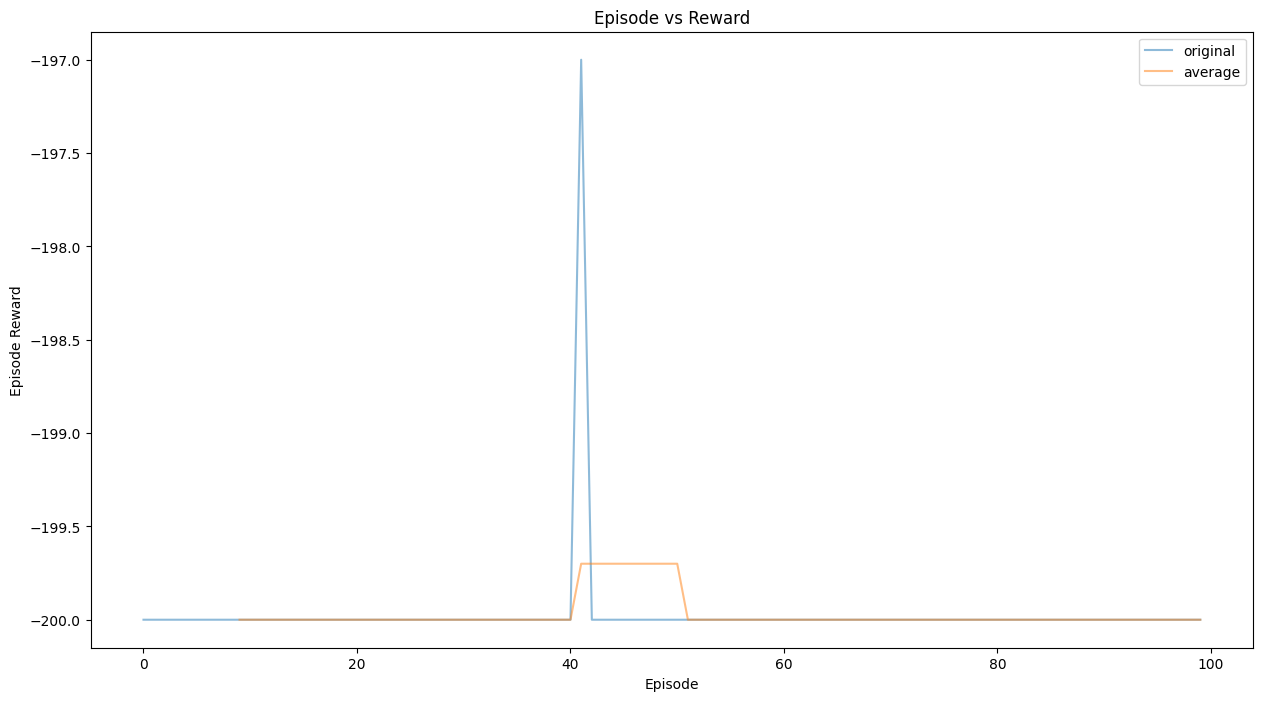

In [19]:
print(t2-t1)
def get_running_stat(stat, stat_len):
    cum_sum = np.cumsum(np.insert(stat, 0, 0)) 
    return (cum_sum[stat_len:] - cum_sum[:-stat_len]) / stat_len

episode, r, l = np.array(stats_rewards_list).T
cum_r = get_running_stat(r, 10)
cum_l = get_running_stat(l, 10)

# plot rewards
plt.figure(figsize=(15,8))
plt.plot(episode, r, alpha = 0.5, label='original')
plt.plot(episode[-len(cum_r):], cum_r, alpha = 0.5, label='average')
plt.title('Episode vs Reward')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
i+=1
plt.savefig('image'+str(i)+'.png')

In [ ]:
import time
from tqdm import tqdm

stats_rewards_list = [] # store stats for plotting in this
# stats_every = 10 # print stats every this many episodes
total_reward = 0
timesteps = 0
episode_length = 0
stats_actor_loss, stats_critic_loss = [], []

t1 = time.time()
for ep in range(episodes):  # tqdm for episode progress

    print(ep)
    
    achieved_g, desired_g, state, state_prime = unpackObs(env.reset())

    # train in each episode until episode is done
    while True:
        timesteps += 1
        episode_length += 1
        
        # select an action from the agent's policy
        action = agent.select_action(state[3:])
        
        # enter action into the env
        observation, reward, done, x, info = env.step(action)
        total_reward += reward
        
        achieved_g, desired_g, next_state, next_state_prime = unpackObs_new(observation)
        
        # add experience to replay buffer
        replay_buffer.add((state, next_state, action, reward * reward_scale, 1 - float(done)))
        
        # train the agent
        if len(replay_buffer.storage) > batch_size:
            actor_loss, critic_loss = agent.train(replay_buffer, batch_size)
            stats_actor_loss.append(actor_loss) 
            stats_critic_loss.append(critic_loss) 
            agent.update_target_network_soft()
            
        if done:
            stats_rewards_list.append((ep, total_reward, episode_length))
            
            # Print episode stats
            print('Episode: {}'.format(ep),
                  'Timestep: {}'.format(timesteps),
                  'Total reward: {:.1f}'.format(total_reward),
                  'Episode length: {:.1f}'.format(episode_length),
                  'Actor Loss: {:.4f}'.format(np.mean(stats_actor_loss)), 
                  'Critic Loss: {:.4f}'.format(np.mean(stats_critic_loss)))
            
            # Reset stats
            stats_actor_loss, stats_critic_loss = [], []
            total_reward = 0
            episode_length = 0 
            break
        
        state = next_state

t2 = time.time()

In [ ]:
x0, x1, a, r, d = replay_buffer.sample(batch_size)

In [ ]:
torch.FloatTensor(x1)[1].shape